## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
##  Preaparing X and Y variables
x=df.drop(columns=['math_score'],axis=1)

In [5]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variables: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variables: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variables: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variables: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variables: ",end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variables:  ['female' 'male']
Categories in 'race_ethnicity' variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variables:  ['none' 'completed']


In [7]:
y=df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
## Create Column Transformer with 3 types of transformers
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler=StandardScaler()
ohe=OneHotEncoder()

processor=ColumnTransformer(
    [
        ('OneHotEncoder',ohe,cat_features),
        ('StandardScaler',scaler,num_features)
    ]
)

In [10]:
x=processor.fit_transform(x)

In [11]:
x.shape

(1000, 19)

In [12]:
## Separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true,predict):
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    rmse=np.sqrt(mean_squared_error(true,predict))
    r2score=r2_score(true,predict)
    return mae,rmse,r2score

In [16]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for name,model in models.items():
    model.fit(x_train,y_train) # Train Model
    
    ## Make Predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    ## Evaluate Train and Test Dataset
    
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(name)
    model_list.append(name)
    
    print("Model Preformance for Training set")
    print("- Root Mean Squared Erro: {:.4f}".format(model_train_mae))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}",format(model_train_r2))
    
    print('-------------------------------------------')
    
    print("Model Preformance for Test set")
    print("- Root Mean Squared Erro: {:.4f}".format(model_test_mae))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}",format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model Preformance for Training set
- Root Mean Squared Erro: 4.2667
- Mean Absolute Error: 4.2667
- R2 Score: {:.4f} 0.8743172040139593
-------------------------------------------
Model Preformance for Test set
- Root Mean Squared Erro: 4.2148
- Mean Absolute Error: 4.2148
- R2 Score: {:.4f} 0.8804332983749565


Lasso
Model Preformance for Training set
- Root Mean Squared Erro: 5.2063
- Mean Absolute Error: 5.2063
- R2 Score: {:.4f} 0.8071462015863458
-------------------------------------------
Model Preformance for Test set
- Root Mean Squared Erro: 5.1579
- Mean Absolute Error: 5.1579
- R2 Score: {:.4f} 0.8253197323627853


Ridge
Model Preformance for Training set
- Root Mean Squared Erro: 4.2650
- Mean Absolute Error: 4.2650
- R2 Score: {:.4f} 0.8743042615212909
-------------------------------------------
Model Preformance for Test set
- Root Mean Squared Erro: 4.2111
- Mean Absolute Error: 4.2111
- R2 Score: {:.4f} 0.8805931485028738


K-Neighbors Regressor
Model 

In [17]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=True)

,Model Name,R2_Score
4,Decision Tree,0.751375
3,K-Neighbors Regressor,0.783497
1,Lasso,0.825320
6,XGBRegressor,0.827797
8,AdaBoost Regressor,0.846412
7,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.852054
0,Linear Regression,0.880433
2,Ridge,0.880593


## Ridge Regression

In [18]:
ridge=Ridge(fit_intercept=True)
ridge=ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of model is %.2f" %score)

Accuracy of model is 88.06


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

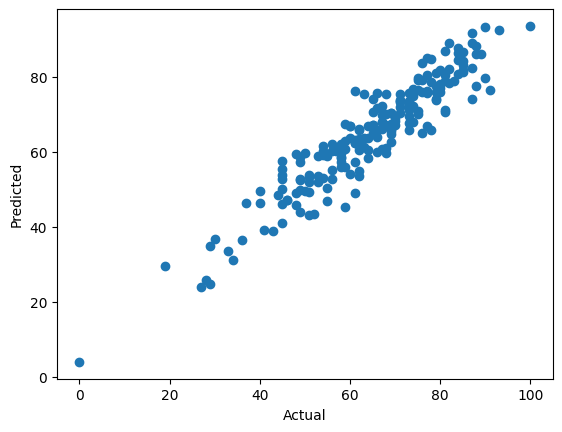

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

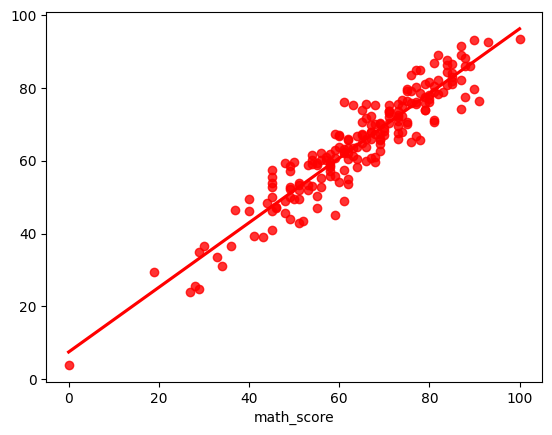

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,"Predicted Value":y_pred,'Difference':y_test-y_pred})

In [22]:
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
